In [ ]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
#for warning
from warnings import filterwarnings
filterwarnings("ignore")


In [ ]:
#df_raw=pd.read_csv(r'C:\Users\nomaniqbal\Desktop\This Week\Metro_Interstate_Traffic_Volume\Metro_Interstate_Traffic_Volume.csv', parse_dates=['date_time'], index_col='date_time')
df_raw=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz", parse_dates=['date_time'], index_col='date_time')
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [ ]:
df_raw['holiday'].fillna("None",inplace=True)


In [ ]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


No missing values found

In [ ]:
df_raw.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


##Missing records

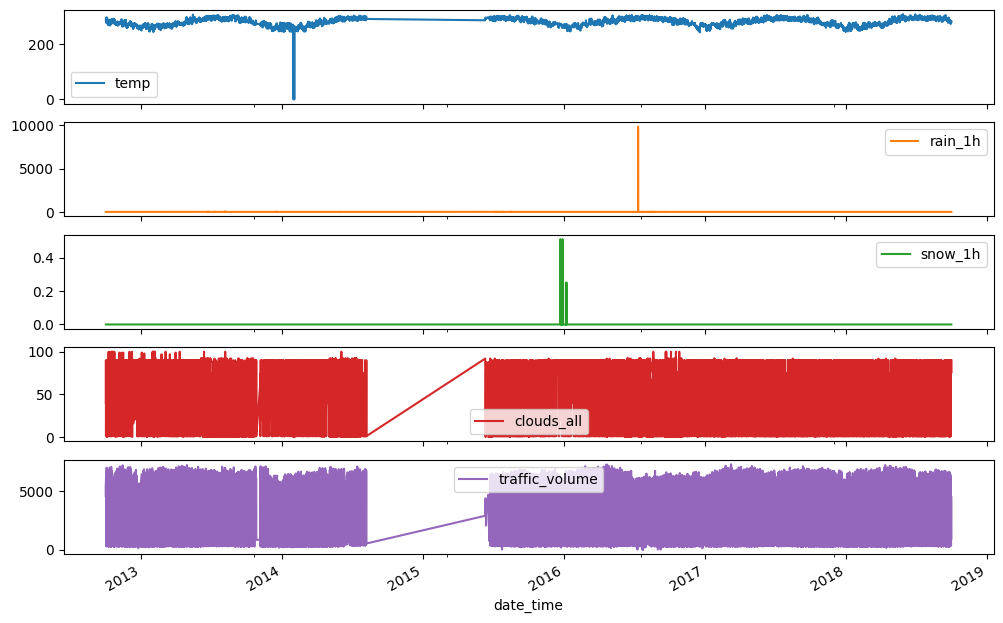

In [ ]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']
plot_features = df_raw[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

Records are missing for late 2014 to mid 2015.

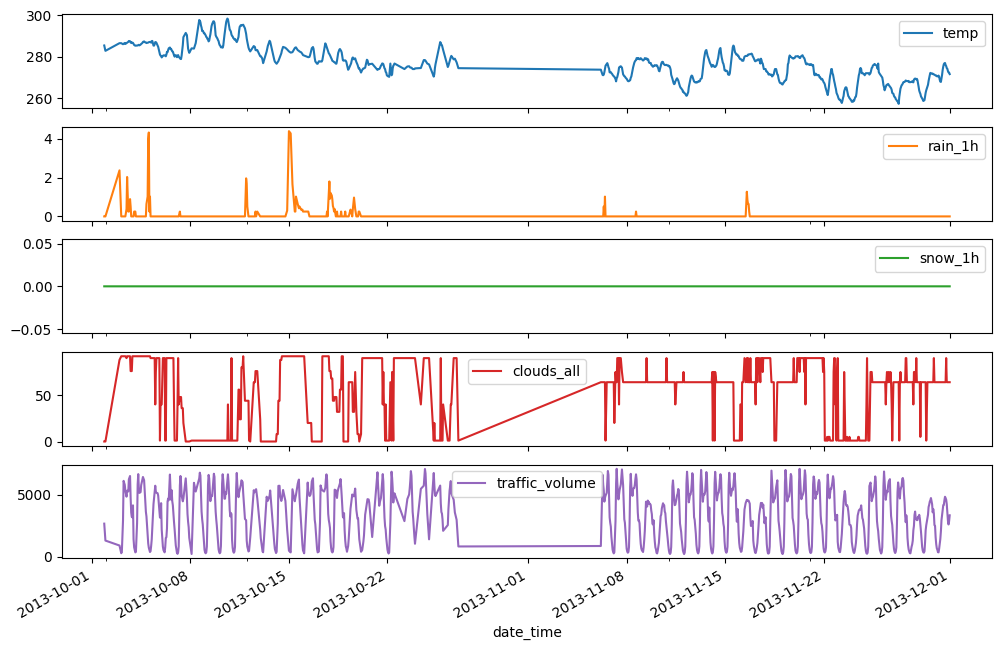

In [ ]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']
plot_features = df_raw[plot_cols]['2013-10':'2013-11']
_ = plot_features.plot(subplots=True, figsize=(12,8))

Records are missing for some part of octobor 2013 and nov 2013

##Handeling Outliers

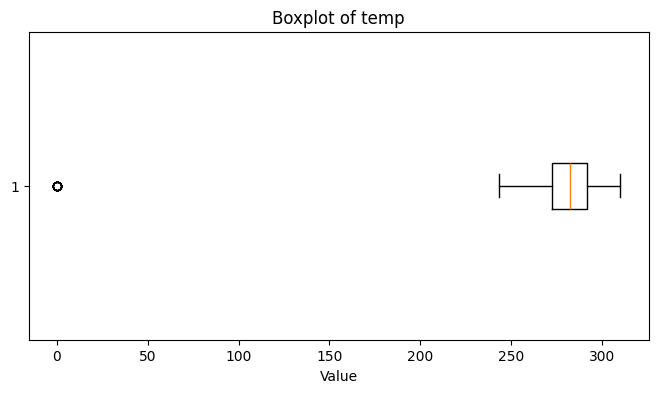

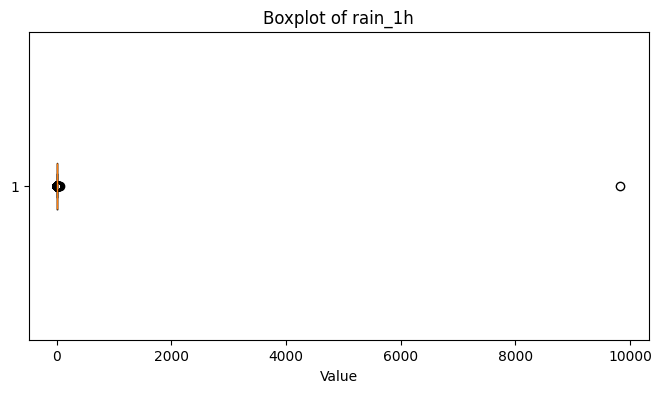

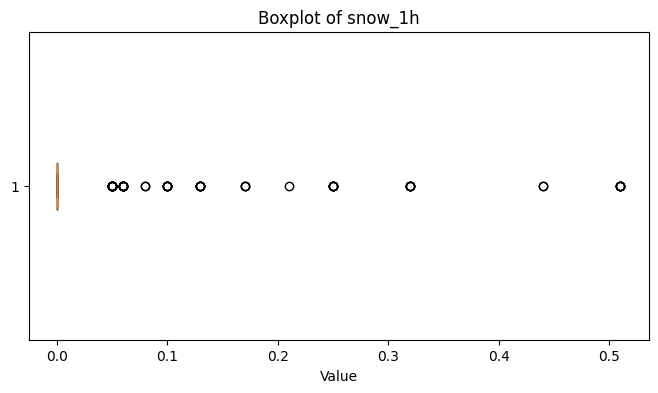

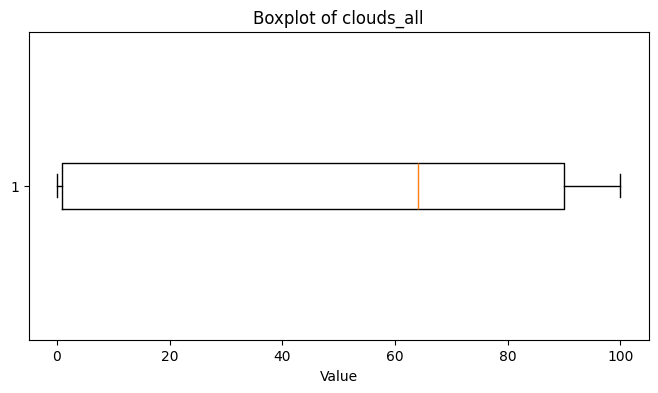

In [ ]:
columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']

for column in columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_raw[column], vert=False)  # Horizontal boxplot
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Value')
    plt.show()

**Temperature**

Temperature values of 0 seem to be erronoes so we will replace with the mean value of the day. We observe 2 days having erronous values [2014-01-31, 2014-02-02]

In [ ]:
df_raw[df_raw.temp == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,962


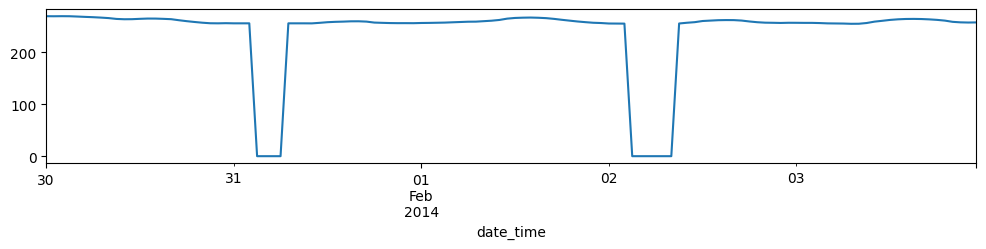

In [ ]:
plot_features = df_raw['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

Replacing zeros in temp with mean of non zero temp of january 31 to feb 2

In [ ]:

df_copy = df_raw['temp']['2014-01-30':'2014-02-03']
df_copy = df_copy.replace(0, np.nan)
mean_value = df_copy.mean()
df_raw['temp'].replace(0, df_raw['temp'].mean(), inplace=True)


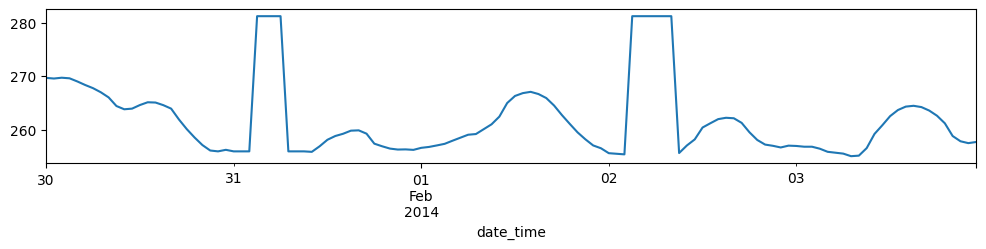

In [ ]:
plot_features = df_raw['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

**Handeling Rain outliers**

In [ ]:
mean_rain = df_raw['rain_1h'][df_raw['rain_1h'] <= 9000].mean()
print(mean_rain)
df_raw['rain_1h'] = np.where(df_raw['rain_1h'] > 9000, mean_rain, df_raw['rain_1h'])


0.13031471070265335


Feature Engeneering

Dropping weather_description

In [ ]:
df_raw.drop(columns=['weather_description'], inplace=True)


In [ ]:
df_raw = pd.get_dummies(df_raw, columns=['weather_main'], prefix='weather', dtype=int)


In [ ]:
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,5545,0,1,0,0,0,0,0,0,0,0,0
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,4516,0,1,0,0,0,0,0,0,0,0,0
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,4767,0,1,0,0,0,0,0,0,0,0,0
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,5026,0,1,0,0,0,0,0,0,0,0,0
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,4918,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,3543,0,1,0,0,0,0,0,0,0,0,0
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,2781,0,1,0,0,0,0,0,0,0,0,0
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,2159,0,0,0,0,0,0,0,0,0,0,1


Treating holiday feature

In [ ]:
df_raw['is_holiday'] = df_raw.pop('holiday').apply(lambda x: 1 if x != 'None' else 0)
df_raw

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,3543,0,1,0,0,0,0,0,0,0,0,0,0
2018-09-30 20:00:00,282.76,0.0,0.0,90,2781,0,1,0,0,0,0,0,0,0,0,0,0
2018-09-30 21:00:00,282.73,0.0,0.0,90,2159,0,0,0,0,0,0,0,0,0,0,1,0


Creating Weekend colmun

In [ ]:
df_raw['is_weekend'] = df_raw.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  int64  
 6   weather_Clouds        48204 non-null  int64  
 7   weather_Drizzle       48204 non-null  int64  
 8   weather_Fog           48204 non-null  int64  
 9   weather_Haze          48204 non-null  int64  
 10  weather_Mist          48204 non-null  int64  
 11  weather_Rain          48204 non-null  int64  
 12  weather_Smoke         48204 non-null  int64  
 13  weather_Snow          48204 non-null  int64  
 14  weather_Squall        48204 non-nul

#Applying sin and cosin to periodic time type data

In [ ]:
timestamp_s = df_raw.index.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

df_raw['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_raw['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_raw['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_raw['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df_raw

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,...,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday,is_weekend,Day sin,Day cos,Year sin,Year cos
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,0,1,0,0,0,...,0,0,0,0,0,0,7.071068e-01,-0.707107,-0.999766,0.021642
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,0,1,0,0,0,...,0,0,0,0,0,0,5.000000e-01,-0.866025,-0.999750,0.022358
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,0,1,0,0,0,...,0,0,0,0,0,0,2.588190e-01,-0.965926,-0.999734,0.023075
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,0,1,0,0,0,...,0,0,0,0,0,0,1.143105e-11,-1.000000,-0.999717,0.023791
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,0,1,0,0,0,...,0,0,0,0,0,0,-2.588190e-01,-0.965926,-0.999700,0.024508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,3543,0,1,0,0,0,...,0,0,0,0,0,1,-9.659258e-01,0.258819,-0.999910,-0.013421
2018-09-30 20:00:00,282.76,0.0,0.0,90,2781,0,1,0,0,0,...,0,0,0,0,0,1,-8.660254e-01,0.500000,-0.999919,-0.012705
2018-09-30 21:00:00,282.73,0.0,0.0,90,2159,0,0,0,0,0,...,0,0,0,1,0,1,-7.071068e-01,0.707107,-0.999928,-0.011988


In [ ]:
df_raw['dayofweek'] = df_raw.index.dayofweek
df_raw['day'] = df_raw.index.day
df_raw['month'] = df_raw.index.month
df_raw['year'] = df_raw.index.year
df_raw['day_hour'] = df_raw.index.hour


In [ ]:
df_raw

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,...,is_weekend,Day sin,Day cos,Year sin,Year cos,dayofweek,day,month,year,day_hour
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,0,1,0,0,0,...,0,7.071068e-01,-0.707107,-0.999766,0.021642,1,2,10,2012,9
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,0,1,0,0,0,...,0,5.000000e-01,-0.866025,-0.999750,0.022358,1,2,10,2012,10
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,0,1,0,0,0,...,0,2.588190e-01,-0.965926,-0.999734,0.023075,1,2,10,2012,11
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,0,1,0,0,0,...,0,1.143105e-11,-1.000000,-0.999717,0.023791,1,2,10,2012,12
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,0,1,0,0,0,...,0,-2.588190e-01,-0.965926,-0.999700,0.024508,1,2,10,2012,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,3543,0,1,0,0,0,...,1,-9.659258e-01,0.258819,-0.999910,-0.013421,6,30,9,2018,19
2018-09-30 20:00:00,282.76,0.0,0.0,90,2781,0,1,0,0,0,...,1,-8.660254e-01,0.500000,-0.999919,-0.012705,6,30,9,2018,20
2018-09-30 21:00:00,282.73,0.0,0.0,90,2159,0,0,0,0,0,...,1,-7.071068e-01,0.707107,-0.999928,-0.011988,6,30,9,2018,21


#Handeling Duplicates

In [ ]:
df_raw.index.duplicated().sum()

7629

Train test Split

In [ ]:
num_features = df_raw.shape[1]
train_df = df_raw[:-15000].resample('1H').mean().pad()
print('train_df:\t', train_df.shape[0])
val_df = df_raw[-15000:-5000].resample('1H').mean().pad()
print('val_df:\t\t', val_df.shape[0])
test_df = df_raw[-5000:].resample('1H').mean().pad()
print('test_df:\t', test_df.shape[0])

train_df:	 40110
val_df:		 8359
test_df:	 4083


Standrization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
my_scaler = MinMaxScaler().fit(train_df)
my_scaler_tv = MinMaxScaler().fit(train_df[['traffic_volume']])
scaled_train_df = pd.DataFrame(my_scaler.transform(train_df), index=train_df.index, columns=train_df.columns)
scaled_val_df = pd.DataFrame(my_scaler.transform(val_df), index=val_df.index, columns=val_df.columns)
scaled_test_df = pd.DataFrame(my_scaler.transform(test_df), index=test_df.index, columns=test_df.columns)


In [ ]:
StartBold = "\033[1m"
EndBold = "\033[0m"

#window geneator

In [ ]:
'''
[Code Provided by the tutorial]
The WindowGenerator class.
Start by creating the `WindowGenerator` class. The `__init__` method includes
all the necessary logic for the input and label indices.
It also takes the train, eval, and test dataframes as input.
These will be converted to `tf.data.Dataset`s of windows later.

This class can:

1 - Handle the indexes and offsets as shown in the diagrams above.
2 - Split windows of features into a (features, labels) pairs.
3 - Plot the content of the resulting windows.
4 - Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.
'''
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, batch_size=32,
               train_df=scaled_train_df, val_df=scaled_val_df, test_df=scaled_test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.example = None

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    self.batch_size = batch_size

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size} = {self.input_width}+({self.shift-self.label_width}+{self.label_width})',
        f'Batch size: {self.batch_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices} start: [{self.label_start}]',
        f'Label column name(s): {self.label_columns}'])

  def split_window(self, features):
    '''
      Given a list consecutive inputs, the split_window method will convert
      them to a window of inputs and a window of labels.
    '''
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    '''
      The plot method that allows a simple visualization of the split window
    '''
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')
    # Maskar: Added this line show that we are only showing n slices
    plt.suptitle(f'Showing only {max_n} slices')

  def make_dataset(self, data):
    '''
      Make_dataset method will take a time series DataFrame and convert it to
      a tf.data.Dataset of (input_window, label_window) pairs using the
      preprocessing.timeseries_dataset_from_array function.
    '''
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False, # Maskar: I changed this to False
        batch_size=self.batch_size, # 32,
        )

    ds = ds.map(self.split_window)

    return ds

  # The WindowGenerator object holds training, validation and test data.
  # Add properties for accessing them as tf.data.Datasets using the above make_dataset method.
  # Also add a standard example batch for easy access and plotting:
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  @example.setter
  def example(self, var):
    self._example = var


#Ploting function

In [ ]:
def plot_train_validation(history, validation_data, metric='mean_absolute_error'):
    '''
    Function to plot the training and validation accuracy progress with epochs for a single model
    '''
    plt.plot(history.history[metric], label='train')  # For TF2
    plt.plot(history.history['val_'+metric], label='valid.')  # For TF2
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    #plt.xticks(range(1,len(history.history['loss'])+1,2))
    #plt.ylim([0.5, 1])
    plt.title(f'{len(history.history[metric])} epochs')
    plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.show()

    # Evaluate the learned model with validation set
    print(f'\n\n{StartBold}Validation Scores:{EndBold}\n')
    _ = history.model.evaluate(validation_data, verbose=2)



In [ ]:
def plot_train_test(history, test_data, metric='mean_absolute_error'):
    '''
    Function to plot the training and validation accuracy progress with epochs for a single model
    '''
    plt.plot(history.history[metric], label='train')  # For TF2
    plt.plot(history.history['test_'+metric], label='test.')  # For TF2
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    #plt.xticks(range(1,len(history.history['loss'])+1,2))
    #plt.ylim([0.5, 1])
    plt.title(f'{len(history.history[metric])} epochs')
    plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.show()

    # Evaluate the learned model with validation set
    print(f'\n\n{StartBold}Test Scores:{EndBold}\n')
    _ = history.model.evaluate(test_data, verbose=2)

In [ ]:
class TrainingPlot_Validation(Callback):
    '''
      A keras callback helper function to plot
      the taining/validation plot after each epoch
    '''
    def __init__(self, loss_metric='mean_absolute_error'):
      super().__init__()
      self.loss_metric = loss_metric

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and metrics
        self.losses = []
        self.val_losses = []
        self.logs = []

    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get(self.loss_metric)
        val_loss = logs.get('val_'+self.loss_metric)

        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(loss)
        self.val_losses.append(val_loss)

        # Plots every n-th epoch
        if epoch > 0 and epoch%1==0:

            # Clear the previous plot
            IPython.display.clear_output(wait=True)
            #clear_output(wait=True)
            N = np.arange(0, len(self.losses))

            # You can chose the style of your preference
            #plt.style.use("seaborn")
            #plt.figure(figsize=(10,3))
            plt.xlabel('Epoch')
            plt.ylabel(self.loss_metric)
            plt.plot(N, self.losses, label='train')
            plt.plot(N, self.val_losses, label='valid.')
            plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
            val_denorm = float(my_scaler_tv.inverse_transform(np.array([[val_loss]])))
            plt.title(f'Last validation value = {val_denorm:.2f}')
            plt.legend(loc='upper right')
            plt.show()

In [ ]:
class TrainingPlot_Test(Callback):
    '''
      A keras callback helper function to plot
      the taining/validation plot after each epoch
    '''
    def __init__(self, loss_metric='mean_absolute_error'):
      super().__init__()
      self.loss_metric = loss_metric

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and metrics
        self.losses = []
        self.test_losses = []
        self.logs = []

    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get(self.loss_metric)
        test_loss = logs.get('val_'+self.loss_metric)  # Gets the validation loss

        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(loss)
        self.test_losses.append(test_loss)

        # Plots every n-th epoch
        if epoch > 0 and epoch%1==0:

            # Clear the previous plot
            IPython.display.clear_output(wait=True)
            #clear_output(wait=True)
            N = np.arange(0, len(self.losses))

            # You can chose the style of your preference
            #plt.style.use("seaborn")
            #plt.figure(figsize=(10,3))
            plt.xlabel('Epoch')
            plt.ylabel(self.loss_metric)
            plt.plot(N, self.losses, label='train')
            plt.plot(N, self.test_losses, label='test.')
            plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)

            # Check if test_loss is not None before calculation
            if test_loss is not None:
              test_denorm = float(my_scaler_tv.inverse_transform(np.array([[test_loss]])))
              plt.title(f'Last test value = {test_denorm:.2f}')  # Uses test_denorm for the title
            else:
              plt.title(f'Last test value = N/A')  # Handles cases where test_loss is None

            plt.legend(loc='upper right')
            plt.show()

Compile and fit

In [ ]:
def compile_and_fit_val(model, window, patience=5, max_epochs=30,
                    model_label='model', log_dict=None):
    plot_metrics = TrainingPlot_Validation()

    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.001, patience=patience, mode='min', verbose=1 )

    #mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min', restore_best_weights=True )

    model.compile( optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()] )

    history = model.fit( window.train, epochs=max_epochs, validation_data=window.val, callbacks=[plot_metrics, early_stopping, rlr] )

    if log_dict:
        log_dict['my_models'][model_label] = model

        IPython.display.clear_output()

        print(f'\n\n{StartBold}Training vs. Validation:{EndBold}\n')
        plot_train_validation(history, window.val)

        log_dict['multi_val_performance'][model_label] = model.evaluate(window.val, verbose=0)
        log_dict['multi_performance'][model_label] = model.evaluate(window.train, verbose=0)


    val_predictions = model.predict(window.val)
    evaluate_predictions(val_df.traffic_volume, val_predictions)

    return history

In [ ]:
def compile_and_fit_test(model, window, patience=5, max_epochs=30,
                    model_label='model', log_dict=None):
    plot_metrics = TrainingPlot_Test()

    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.001, patience=patience, mode='min', verbose=1 )

    #mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min', restore_best_weights=True )

    model.compile( optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()] )

    # Changed test_data to validation_data
    history = model.fit( window.train, epochs=max_epochs, validation_data=window.test, callbacks=[plot_metrics, early_stopping, rlr] )

    if log_dict:
        log_dict['my_models'][model_label] = model

        IPython.display.clear_output()

        print(f'\n\n{StartBold}Training vs. Test:{EndBold}\n')
        # Evaluating the model using the test set
        plot_train_validation(history, window.test)

        log_dict['multi_val_performance'][model_label] = model.evaluate(window.test, verbose=0)
        log_dict['multi_performance'][model_label] = model.evaluate(window.train, verbose=0)


    test_predictions = model.predict(window.test)
    evaluate_predictions(test_df.traffic_volume, test_predictions)

    return history

Evaluation prediction

In [ ]:
def evaluate_predictions(y_true, y_pred, plot_start_index=-500):
    print(f'\n\n{StartBold}Predictions Evaluation:{EndBold}\n')
    y_p = np.asarray(my_scaler_tv.inverse_transform(y_pred.reshape(-1,1))).ravel()
    n_predictions = len(y_p)
    y = np.asarray(y_true[-n_predictions:]).ravel()
    print('Predictions:', n_predictions)
    mae = float(tf.keras.metrics.MeanAbsoluteError()(y, y_p))
    mae_scaled = float(my_scaler_tv.transform(np.array([[mae]])))
    print(f'MAE: {mae:.2f} ({mae_scaled:.4f})')

    plt.subplots(figsize=(15,2))
    plt.plot(y[plot_start_index:], marker='.', label='true')
    plt.plot(y_p[plot_start_index:], marker='.', label='predicted')
    plt.legend()
    plt.show()

The models

Total window size: 8 = 6+(1+1)
Batch size: 32
Input indices: [0 1 2 3 4 5]
Label indices: [7] start: [7]
Label column name(s): ['traffic_volume']

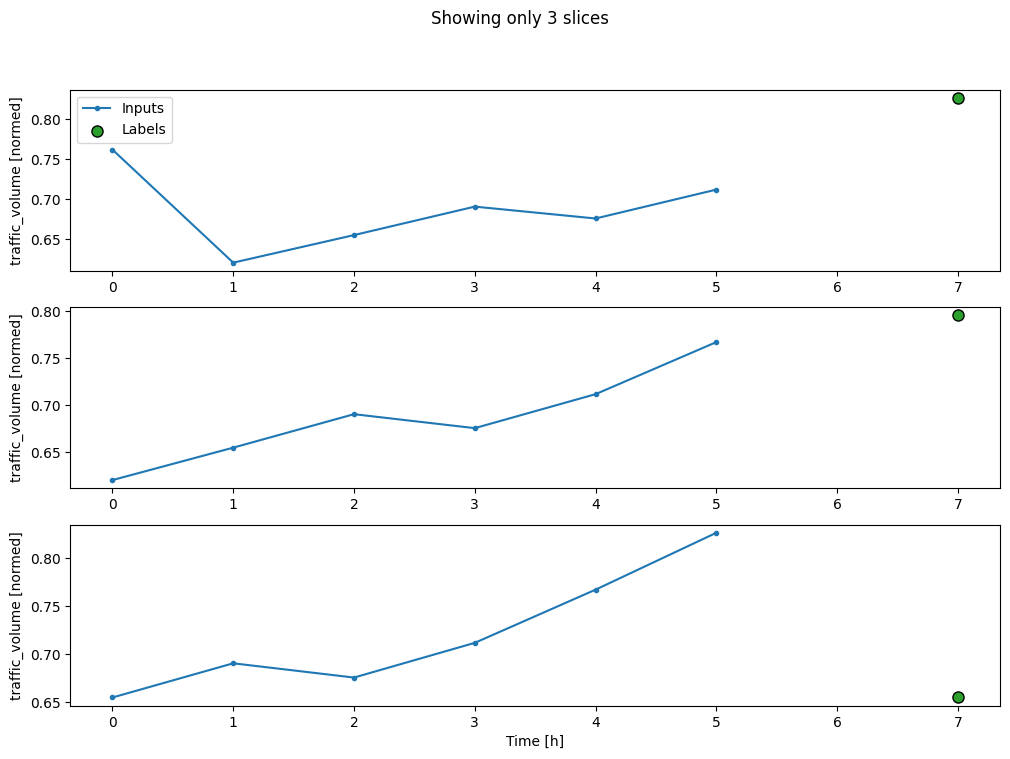

In [ ]:
INPUT_WIDTH = 6
OUT_STEPS = 1
SHIFT = 2
base_window = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=32
                               )

base_window.plot()
base_window

Baseline model

In [ ]:
multi_val_performance = {}
multi_performance = {}
my_models = {}

my_log = {
    'multi_val_performance':multi_val_performance,
    'multi_performance':multi_performance,
    'my_models':my_models
    }

Dense



Training vs. Validation:



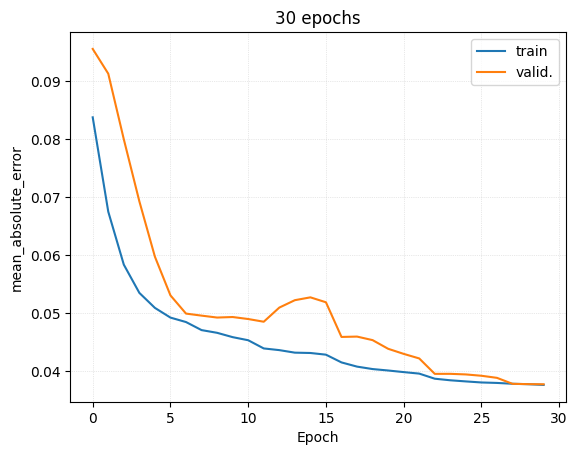



Validation Scores:

261/261 - 1s - 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0378
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Predictions Evaluation:

Predictions: 8352
MAE: 275.17 (0.0378)


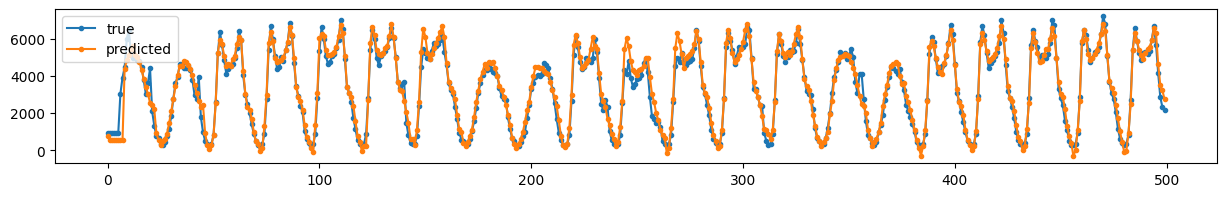

CPU times: user 3min 2s, sys: 40.1 s, total: 3min 42s
Wall time: 2min 32s


In [ ]:
%%time
model_label = 'Dense'
current_window = base_window

dense_model = tf.keras.Sequential([
    Lambda(lambda x: x[:, -1:, :]),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit_val(dense_model, current_window,
                          model_label=model_label, log_dict=my_log)



Training vs. Test:



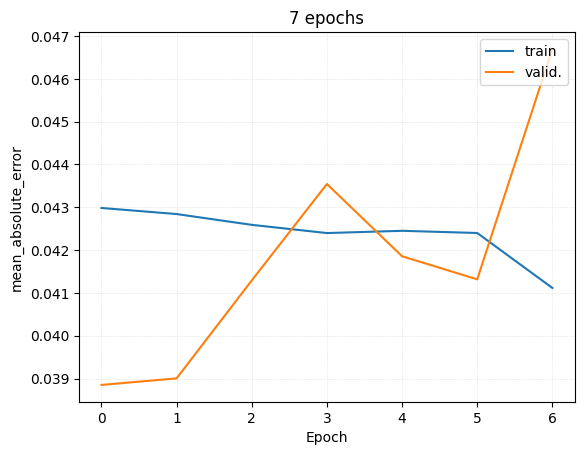



Validation Scores:

128/128 - 0s - 2ms/step - loss: 0.0030 - mean_absolute_error: 0.0390
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Predictions Evaluation:

Predictions: 4076
MAE: 283.96 (0.0390)


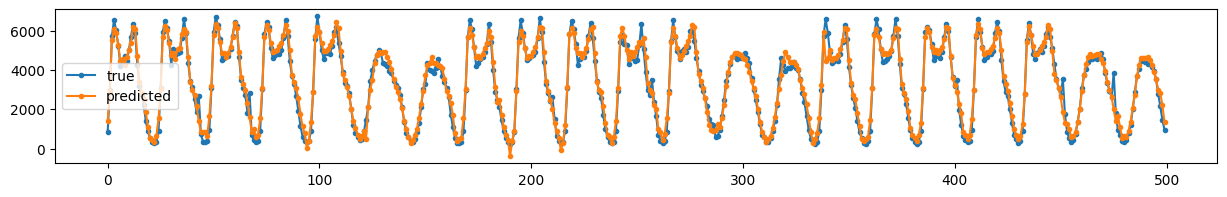

In [ ]:
history = compile_and_fit_test(dense_model, current_window,
                          model_label=model_label, log_dict=my_log)

#RNN



Training vs. Validation:



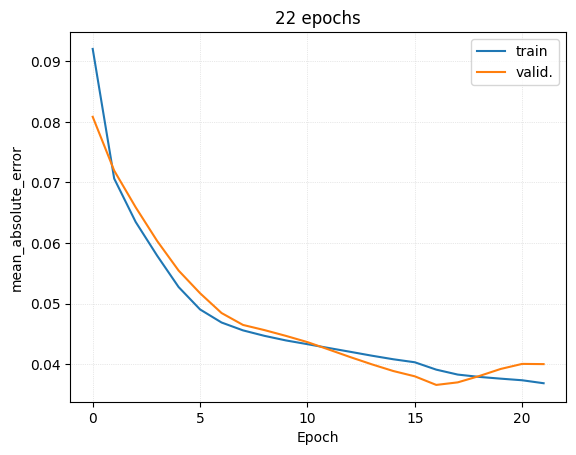



Validation Scores:

261/261 - 1s - 3ms/step - loss: 0.0030 - mean_absolute_error: 0.0366
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Predictions Evaluation:

Predictions: 8352
MAE: 266.13 (0.0366)


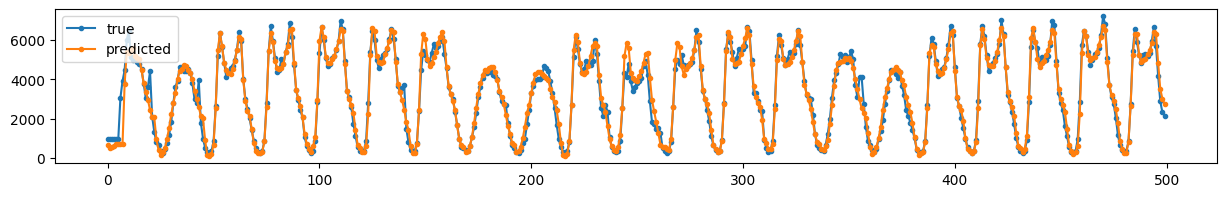

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
CPU times: user 3min 2s, sys: 33.3 s, total: 3min 36s
Wall time: 3min 15s


In [ ]:
%%time
model_label = 'LSTM'
current_window = base_window

lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    LSTM(32, return_sequences=False),
    Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    Dense(OUT_STEPS)
])

history = compile_and_fit(lstm_model, current_window,
                          model_label=model_label, log_dict=my_log)



Training vs. Test:



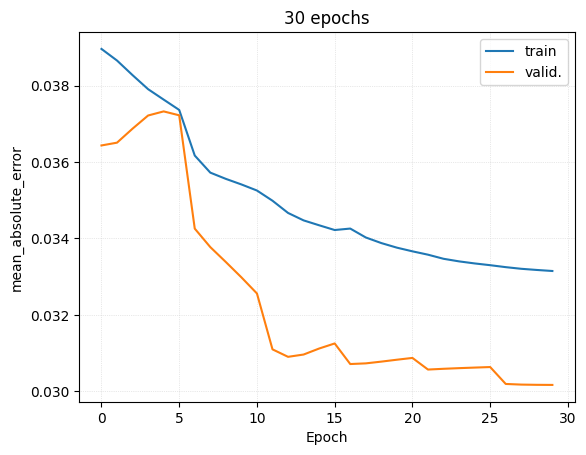



Validation Scores:

128/128 - 0s - 2ms/step - loss: 0.0018 - mean_absolute_error: 0.0302
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Predictions Evaluation:

Predictions: 4076
MAE: 219.79 (0.0302)


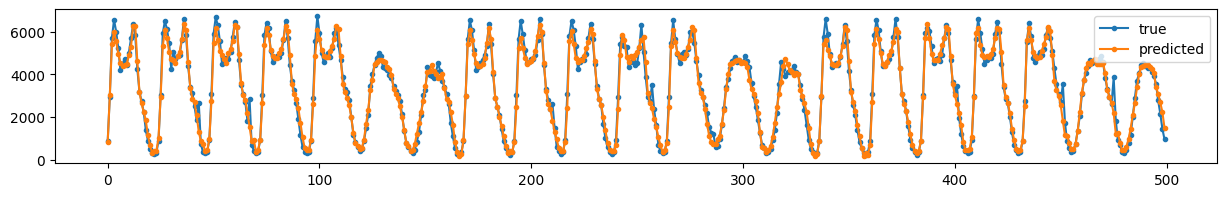

In [ ]:
history = compile_and_fit_test(lstm_model, current_window,
                          model_label=model_label, log_dict=my_log)